# Tips and Tricks

- **[1. Map, Filter and Reduce](#1-Map-Filter-and-Reduce)**
- **[2. Ternary Operators](#2-Ternary-Operators)**
- **[3. Convolution](#3-Convolution)**
- **[4. Collections](#4-Collections)**
    - [4.1. defaultdict](#41-defaultdict)
    - [4.2. Counter](#42-Counter)
    - [4.3. deque](#43-deque)
    - [4.4. namedtuple](#44-namedtuple)
- **[5. Zip and unzip](#5-Zip-and-unzip)**
- **[6. Comprehensions](#6-Comprehensions)**
- **[7. Lambda functions](#7-Lambda-functions)**
- **[8. Assignment expressions](#8-Assignment-expressions)**
- **[9. for/else](#9-for/else)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Map, Filter and Reduce

The `map()` function is a higher-order function. This function accepts another function and a sequence of iterables as parameters and provides output after applying the function to each iterable in the sequence.

In [2]:
def function(a):
    return a * a


x = map(function, (1, 2, 3, 4))
print(x)  # x is the map object
print(list(x))  # transform it to see it

[1, 4, 9, 16]


In [3]:
items = [1, 2, 3, 4, 5]
squared = map(lambda x: x**2, items)  # works with lambda functions
list(squared)

[1, 4, 9, 16, 25]

In [4]:
def multiply(x):
    return x * x


def add(x):
    return x + x


funcs = [multiply, add]
for i in range(5):
    value = list(map(lambda x: x(i), funcs))  # iterable consisting of functions
    print(value)

[0, 0]
[1, 2]
[4, 4]
[9, 6]
[16, 8]


The `filter()` function is used to generate an output list of values that return true when the function is called.

In [5]:
def func(x):
    if x >= 3:
        return x


y = filter(func, (1, 2, 3, 4))
print(y)  # y is the filter object
print(list(y))

[3, 4]


In [6]:
number_list = range(-5, 5)

# works with lambda functions
less_than_zero = filter(lambda x: x < 0, number_list)

print(list(less_than_zero))

[-5, -4, -3, -2, -1]


The `reduce()` function applies a provided function to ‘iterables’ and returns a single value, as the name implies.

In [7]:
from functools import reduce

reduce(lambda a, b: a + b, [23, 21, 45, 98])

187

## 2. Ternary Operators

Ternary operators are more commonly known as conditional expressions in Python. These operators evaluate something based on a condition being true or not.  
  
It allows to quickly test a condition instead of a multiline if statement and can be nested.

In [8]:
a = 10
b = 20

print(
    "Both values are equal"
    if a == b
    else ("a is greater than b" if a > b else "b is greater than a")
)

b is greater than a


## 3. Convolution

We can use convolution to smooth a curve with moving average.

(-1.0, 25.0)

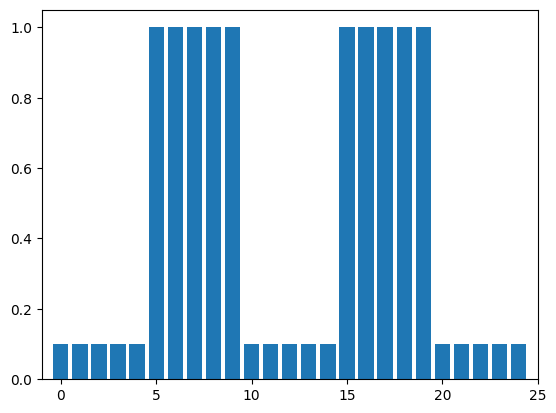

In [9]:
# Function to smooth
f1 = np.array(
    [
        0.1,
        0.1,
        0.1,
        0.1,
        0.1,
        1,
        1,
        1,
        1,
        1,
        0.1,
        0.1,
        0.1,
        0.1,
        0.1,
        1,
        1,
        1,
        1,
        1,
        0.1,
        0.1,
        0.1,
        0.1,
        0.1,
    ]
)

# plt.step(np.arange(0, len(f1)), a)
plt.bar(np.arange(0, len(f1)), f1)
plt.ylim(ymin=0)
plt.xlim(xmin=-1, xmax=25)

<Axes: >

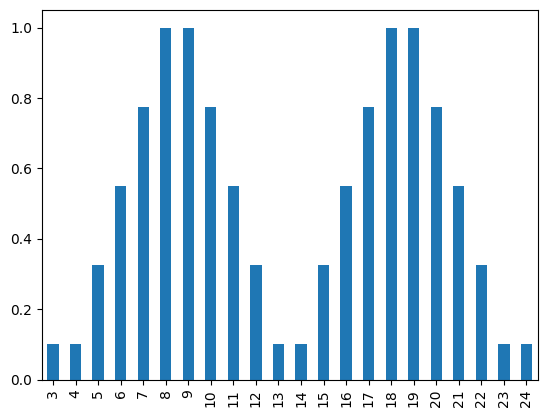

In [10]:
f1_df = pd.DataFrame(f1)

# Rolling average with the pandas function
f1_smoothed = f1_df.rolling(window=4, min_periods=1).mean()
f1_smoothed[3:].plot(kind="bar", legend=False)

In [11]:
# Bin 1 in x parts (here 4), x being the window of the rolling average
f2 = np.repeat(1 / 4, 4)
f2

array([0.25, 0.25, 0.25, 0.25])

<BarContainer object of 22 artists>

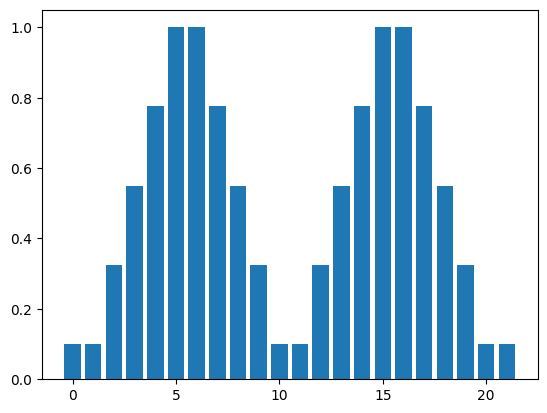

In [12]:
# Convolve with f2 to do rolling average
convolution = np.convolve(f1, f2, "valid")
plt.bar(np.arange(0, len(convolution)), convolution)

## 4. Collections

Several useful data types in the collections module.

### 4.1. defaultdict

Create a `dict` with a default value.

In [13]:
from collections import defaultdict

colours = (
    ("Pierre", "Yellow"),
    ("Paul", "Blue"),
    ("Jacques", "Green"),
    ("Paul", "Black"),
    ("Pierre", "Red"),
    ("Jacques", "Silver"),
)
# A list will become the default value
favourite_colours = defaultdict(list)

# When name is not a key, a list will be created as a default value
# for that key
# Since the value is an array we can append colour
for name, colour in colours:
    favourite_colours[name].append(colour)

favourite_colours

defaultdict(list,
            {'Pierre': ['Yellow', 'Red'],
             'Paul': ['Blue', 'Black'],
             'Jacques': ['Green', 'Silver']})

### 4.2. Counter

Count the occurence of an item.

In [14]:
from collections import Counter

test = ["a", "b", "c", "a"]
print(Counter(test))

colours = (
    ("Pierre", "Yellow"),
    ("Paul", "Blue"),
    ("Jacques", "Green"),
    ("Paul", "Black"),
    ("Pierre", "Red"),
    ("Jean", "Yellow"),
)

# Can count from a written generator
favs = Counter(name for name, colour in colours)
fav_colours = Counter(colour for name, colour in colours)
print(favs)
print(fav_colours)

# Same thing as doing the classic loop:
# res = dict()
# for name, colour in colours:
#     if name not in res.keys():
#         res[name] = 1
#     else:
#         res[name] += 1

# print(res)

# Same thing with defaultdict:
# from collections import defaultdict
# res = defaultdict(lambda: 0)
# for name, colour in colours:
#         res[name] += 1
#
# print(res)

Counter({'a': 2, 'b': 1, 'c': 1})
Counter({'Pierre': 2, 'Paul': 2, 'Jacques': 1, 'Jean': 1})
Counter({'Yellow': 2, 'Blue': 1, 'Green': 1, 'Black': 1, 'Red': 1})


### 4.3. deque

`deque` provides you with a double ended queue which means that you can append and delete elements from either side of the queue.

In [15]:
from collections import deque

d = deque()

d.append("1")
d.append("2")
d.append("3")
d.appendleft("9")

print(d)

d.popleft()

print(d)

d.pop()

print(d)

deque(['9', '1', '2', '3'])
deque(['1', '2', '3'])
deque(['1', '2'])


In [16]:
# When size is fixed, values are pushed othello style
d = deque([0, 1, 2, 3, 5], maxlen=5)
print(d)

d.extend([6, 7])
print(d)

# Be careful of the order
d.extendleft([8, 9])
print(d)

deque([0, 1, 2, 3, 5], maxlen=5)
deque([2, 3, 5, 6, 7], maxlen=5)
deque([9, 8, 2, 3, 5], maxlen=5)


### 4.4. namedtuple

Create sort of a mini Class, just like an **immutable** `dict`.

In [17]:
from collections import namedtuple

Animal = namedtuple("Animal", "name age type")
perry = Animal(name="perry", age=31, type="cat")

print(perry)

print(perry.name)

Animal(name='perry', age=31, type='cat')
perry


In [18]:
# You can also transform it into a dict
perry_dict = perry._asdict()

print(perry_dict)

{'name': 'perry', 'age': 31, 'type': 'cat'}


## 5. Zip and unzip

`Zip()` is a useful function that allows you to combine two lists easily.

After calling zip, an iterator is returned. In order to see the content wrapped inside, we need to first convert it to a list.

In [19]:
first_name = ["Joe", "Earnst", "Thomas", "Martin", "Charles"]
last_name = ["Schmoe", "Ehlmann", "Fischer", "Walter", "Rogan", "Green"]
age = [23, 65, 11, 36, 83]

zipped_list = list(zip(first_name, last_name, age))
zipped_list

[('Joe', 'Schmoe', 23),
 ('Earnst', 'Ehlmann', 65),
 ('Thomas', 'Fischer', 11),
 ('Martin', 'Walter', 36),
 ('Charles', 'Rogan', 83)]

In [20]:
for first_name, last_name, age in zipped_list:
    print(f"{first_name} {last_name} is {age} years old")

Joe Schmoe is 23 years old
Earnst Ehlmann is 65 years old
Thomas Fischer is 11 years old
Martin Walter is 36 years old
Charles Rogan is 83 years old


In [21]:
# We can unzip with the operator "*"
name_unzipped, last_name_unzipped, age_unzipped = zip(*zipped_list)
print(name_unzipped)
print(last_name_unzipped)
print(age_unzipped)

('Joe', 'Earnst', 'Thomas', 'Martin', 'Charles')
('Schmoe', 'Ehlmann', 'Fischer', 'Walter', 'Rogan')
(23, 65, 11, 36, 83)


## 6. Comprehensions

Comprehensions are constructs that allow sequences to be built from other sequences.

In [22]:
# It uses that form:
# variable = [expression(element) for element in input_list if condition]

# Can be a list
squared_even_list = [x**2 for x in range(10) if (x**2) % 2 == 0]
print(squared_even_list)

# Or a set
squared_even_set = {x**2 for x in range(10) if (x**2) % 2 == 0}
print(squared_even_set)

# Or a dict
value_even = {v: True if v % 2 == 0 else False for v in range(6)}
print(value_even)

# Or a generator
squared_even_generator = (x**2 for x in range(10) if x ** 2 % 2 == 0)
print(squared_even_generator)

# You can then make it a tuple
tuple(squared_even_generator)

[0, 4, 16, 36, 64]
{0, 64, 4, 36, 16}
{0: True, 1: False, 2: True, 3: False, 4: True, 5: False}
<generator object <genexpr> at 0x000001941CC735E0>


(0, 4, 16, 36, 64)

## 7. Lambda functions

They are known as anonymous functions. They are just like normal functions and behave like them.

In [23]:
# It uses that form:
# lambda argument: manipulate(argument)

test_list = [(1, 2), (9, 10), (4, 1), (13, -3)]
print(f"original list : {test_list}")

# list.sort() is in-place while sorted() create a new list
# key argument gives a function to apply to each elements before the sort

# To sort by the first element in each pair your can use:
res1 = sorted(test_list, key=lambda x: x[0])
# To sort by the second element in each pair your can use:
res2 = sorted(test_list, key=lambda x: x[1])

print(f"sort by the first element : {res1}")
print(f"sort by the second element : {res2}")

original list : [(1, 2), (9, 10), (4, 1), (13, -3)]
sort by the first element : [(1, 2), (4, 1), (9, 10), (13, -3)]
sort by the second element : [(13, -3), (4, 1), (1, 2), (9, 10)]


## 8. Assignment expressions

In certain situation, it is easier to use assignment expressions (`:=`) instead of the classic assignment statement (`=`).

In [24]:
my_list = [1, 2, 7, 5, 9, 6, 11, 13, 15]
print("The original list is:", my_list)

# Classic way compute **2 two times
new_list = [i**2 for i in my_list if i**2 >= 100]
print("The output list is:", new_list)

# Assignment expression way save a computation
new_list2 = [j for i in my_list if (j := i**2) >= 100]
print("The output list is:", new_list2)

# With while loop, the syntax can also be easier to understand
#
# Classic way:
# command = input("> ")
# while command != "quit":
#     print("You entered:", command)
#     command = input("> ")
#
# Assignment expression way:
# while (command := input("> ")) != "quit":
#     print("You entered:", command)

The original list is: [1, 2, 7, 5, 9, 6, 11, 13, 15]
The output list is: [121, 169, 225]
The output list is: [121, 169, 225]


## 9. for/else

The else keyword in a for loop specifies a block of code to be executed when the loop is finished.

In [25]:
for n in range(2, 10):
    for x in range(2, n):
        if n % x == 0:
            print(n, "equals", x, "*", n / x)
            break
    else:
        # loop fell through without finding a factor
        print(n, "is a prime number")

2 is a prime number
3 is a prime number
4 equals 2 * 2.0
5 is a prime number
6 equals 2 * 3.0
7 is a prime number
8 equals 2 * 4.0
9 equals 3 * 3.0
